# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# import data into pandas dataframe

In [2]:
data = pd.read_csv('stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [3]:
# check for null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# replace null value with the mean 
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [5]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualize the data

<Axes: xlabel='gender', ylabel='count'>

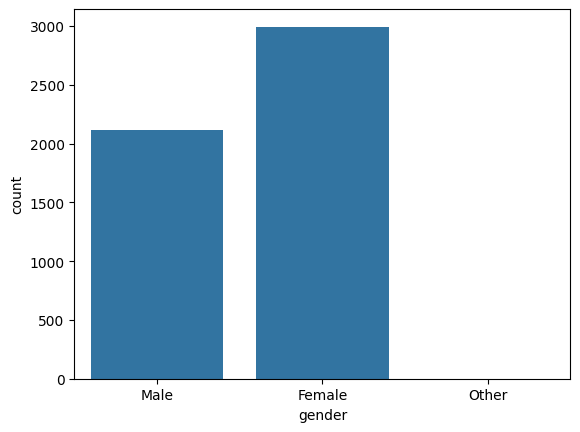

In [6]:
sns.countplot(data,x='gender')

<Axes: xlabel='ever_married', ylabel='count'>

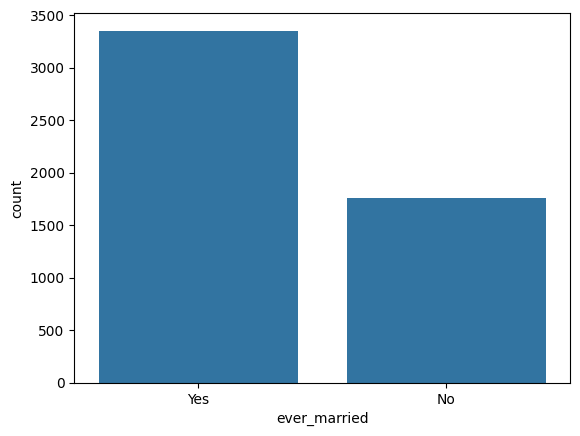

In [7]:
sns.countplot(data, x='ever_married')

<Axes: xlabel='Residence_type', ylabel='count'>

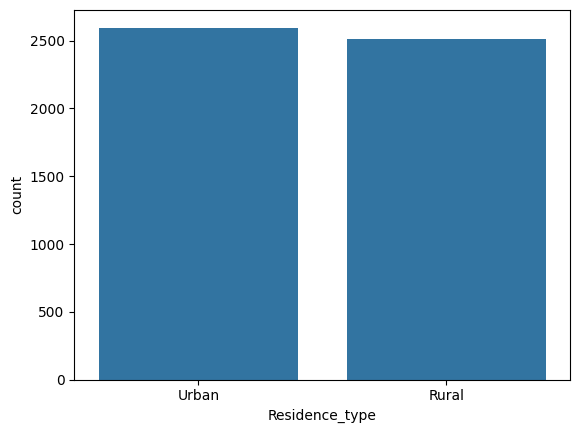

In [8]:
sns.countplot(data, x='Residence_type')

In [24]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 259.2 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 259.2 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 259.2 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 259.2 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 103.4 kB/s eta 0:00:03
   --------- ----------------------------- 61.4/258.3 kB 155.6 kB/s eta 0:00:02
   ---------- ---------------------------- 71.7/258.3 kB 163.8 kB/s eta 0:00:02
   ------------- ------------------------- 92.2/258.3 kB 201.3 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 201.3 kB/s eta 0:

<Axes: xlabel='work_type', ylabel='count'>

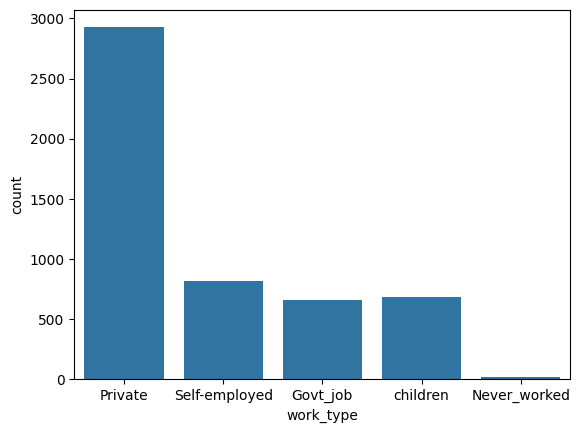

In [9]:
sns.countplot(data, x='work_type')

# convert categorical data to numerical

In [10]:

from sklearn.preprocessing import LabelEncoder

In [11]:
# get the column names 
data.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [12]:
# convert the categorical data to numerical
le = LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])

In [13]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# feature Selection

In [14]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop(columns=['id','stroke'])

In [16]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [17]:
y = data['stroke']

In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(4088, 10)

In [21]:
y_train.shape

(4088,)

In [22]:
best_5 = SelectKBest(chi2,k=5).fit(X_train,y_train)
mask = best_5.get_support()
new_features = []
for bool, feature in zip(mask,X_train.columns):
    if bool:
        new_features.append(feature)
print("the new feature is {}".format(new_features))
    

the new feature is ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level']


In [23]:
# select the best features
X_best = data[['age','hypertension','heart_disease','ever_married','avg_glucose_level']]
y_best = data['stroke']

In [24]:
X_best.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,67.0,0,1,1,228.69
1,61.0,0,0,1,202.21
2,80.0,0,1,1,105.92
3,49.0,0,0,1,171.23
4,79.0,1,0,1,174.12


In [25]:
y_best.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [26]:
#split the best feature
X_train,X_test,y_train,y_test=train_test_split(X_best,y_best,test_size=0.2,random_state=42)

In [27]:
X_train.shape,y_train.shape

((4088, 5), (4088,))

In [28]:
X_test.shape,y_test.shape

((1022, 5), (1022,))

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
model_1 = lr.fit(X_train,y_train)
model_1

LogisticRegression()

In [32]:
# predict with our model
pred = model_1.predict(X_test)
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [33]:
y_test[0:5]

4688    0
4478    0
3849    0
4355    0
3826    0
Name: stroke, dtype: int64

# Evaluate performance

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
acc = accuracy_score(y_test,pred)
acc*100

93.9334637964775

In [35]:
cf = confusion_matrix(y_test,pred)
print(cf)

[[960   0]
 [ 62   0]]


<Axes: >

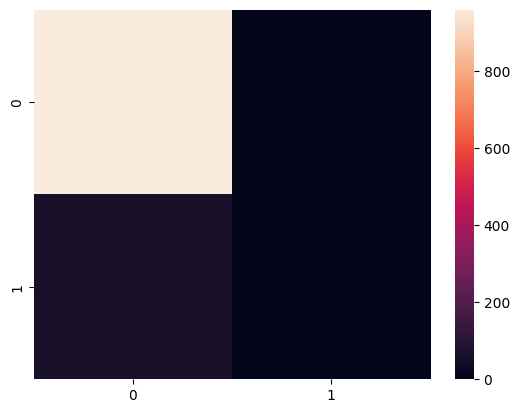

In [36]:
sns.heatmap(cf)

the new feature is ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level'

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
value =np.array([100,1,1,2,200])
v=value.reshape(1,-1)
pred= model_1.predict(v)
if pred==0:
    print("No stroke")
else:
    print("you might have stroke")

you might have stroke


# save model

In [47]:
import pickle


In [48]:
with open('stroke_prediction.pkl','wb') as file:
    pickle.dump(model_1,file)
print("done")

done
